# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Matplolib default parameters
from matplotlib import rcParams
plt.style.use('default')
plt.rcParams['axes.prop_cycle'] = plt.rcParamsDefault['axes.prop_cycle']

# import warning
import warnings
warnings.filterwarnings('ignore')

# Set option max columns display
pd.set_option('max_columns', 150)
pd.set_option('max_rows', 100)

# Dataset Overview

The data set contains the response metrics for 60 separate sonar frequencies sent out against a known mine field (and known rocks). These frequencies are then labeled with the known object they were beaming the sound at (either a rock or a mine).

Data Source: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

In [2]:
df = pd.read_csv('sonar.all-data.csv')
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,Freq_11,Freq_12,Freq_13,Freq_14,Freq_15,Freq_16,Freq_17,Freq_18,Freq_19,Freq_20,Freq_21,Freq_22,Freq_23,Freq_24,Freq_25,Freq_26,Freq_27,Freq_28,Freq_29,Freq_30,Freq_31,Freq_32,Freq_33,Freq_34,Freq_35,Freq_36,Freq_37,Freq_38,Freq_39,Freq_40,Freq_41,Freq_42,Freq_43,Freq_44,Freq_45,Freq_46,Freq_47,Freq_48,Freq_49,Freq_50,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [7]:
print(f'This dataset contains of {df.shape[0]} rows and {df.shape[1]} columns')

This dataset contains of 208 rows and 61 columns


In [12]:
# check missing values
df.isnull().any()

Freq_1     False
Freq_2     False
Freq_3     False
Freq_4     False
Freq_5     False
Freq_6     False
Freq_7     False
Freq_8     False
Freq_9     False
Freq_10    False
Freq_11    False
Freq_12    False
Freq_13    False
Freq_14    False
Freq_15    False
Freq_16    False
Freq_17    False
Freq_18    False
Freq_19    False
Freq_20    False
Freq_21    False
Freq_22    False
Freq_23    False
Freq_24    False
Freq_25    False
Freq_26    False
Freq_27    False
Freq_28    False
Freq_29    False
Freq_30    False
Freq_31    False
Freq_32    False
Freq_33    False
Freq_34    False
Freq_35    False
Freq_36    False
Freq_37    False
Freq_38    False
Freq_39    False
Freq_40    False
Freq_41    False
Freq_42    False
Freq_43    False
Freq_44    False
Freq_45    False
Freq_46    False
Freq_47    False
Freq_48    False
Freq_49    False
Freq_50    False
Freq_51    False
Freq_52    False
Freq_53    False
Freq_54    False
Freq_55    False
Freq_56    False
Freq_57    False
Freq_58    False
Freq_59    Fal

In [14]:
# check duplicate
df.duplicated().sum()

0

# Exploratory Data Analysis

In [6]:
# copy data
eda = df.copy()

## Descriptive Analysis

In [7]:
eda.describe().T

,count,mean,std,min,25%,50%,75%,max
Freq_1,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
Freq_2,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
Freq_3,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
Freq_4,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
Freq_5,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010
Freq_6,208.0,0.104570,0.059105,0.0102,0.067025,0.09215,0.134125,0.3823
Freq_7,208.0,0.121747,0.061788,0.0033,0.080900,0.10695,0.154000,0.3729
Freq_8,208.0,0.134799,0.085152,0.0055,0.080425,0.11210,0.169600,0.4590
Freq_9,208.0,0.178003,0.118387,0.0075,0.097025,0.15225,0.233425,0.6828
Freq_10,208.0,0.208259,0.134416,0.0113,0.111275,0.18240,0.268700,0.7106


## Univariate Analysis

In [9]:
len(eda.columns)

61

In [10]:
num = eda.select_dtypes(include='number').columns

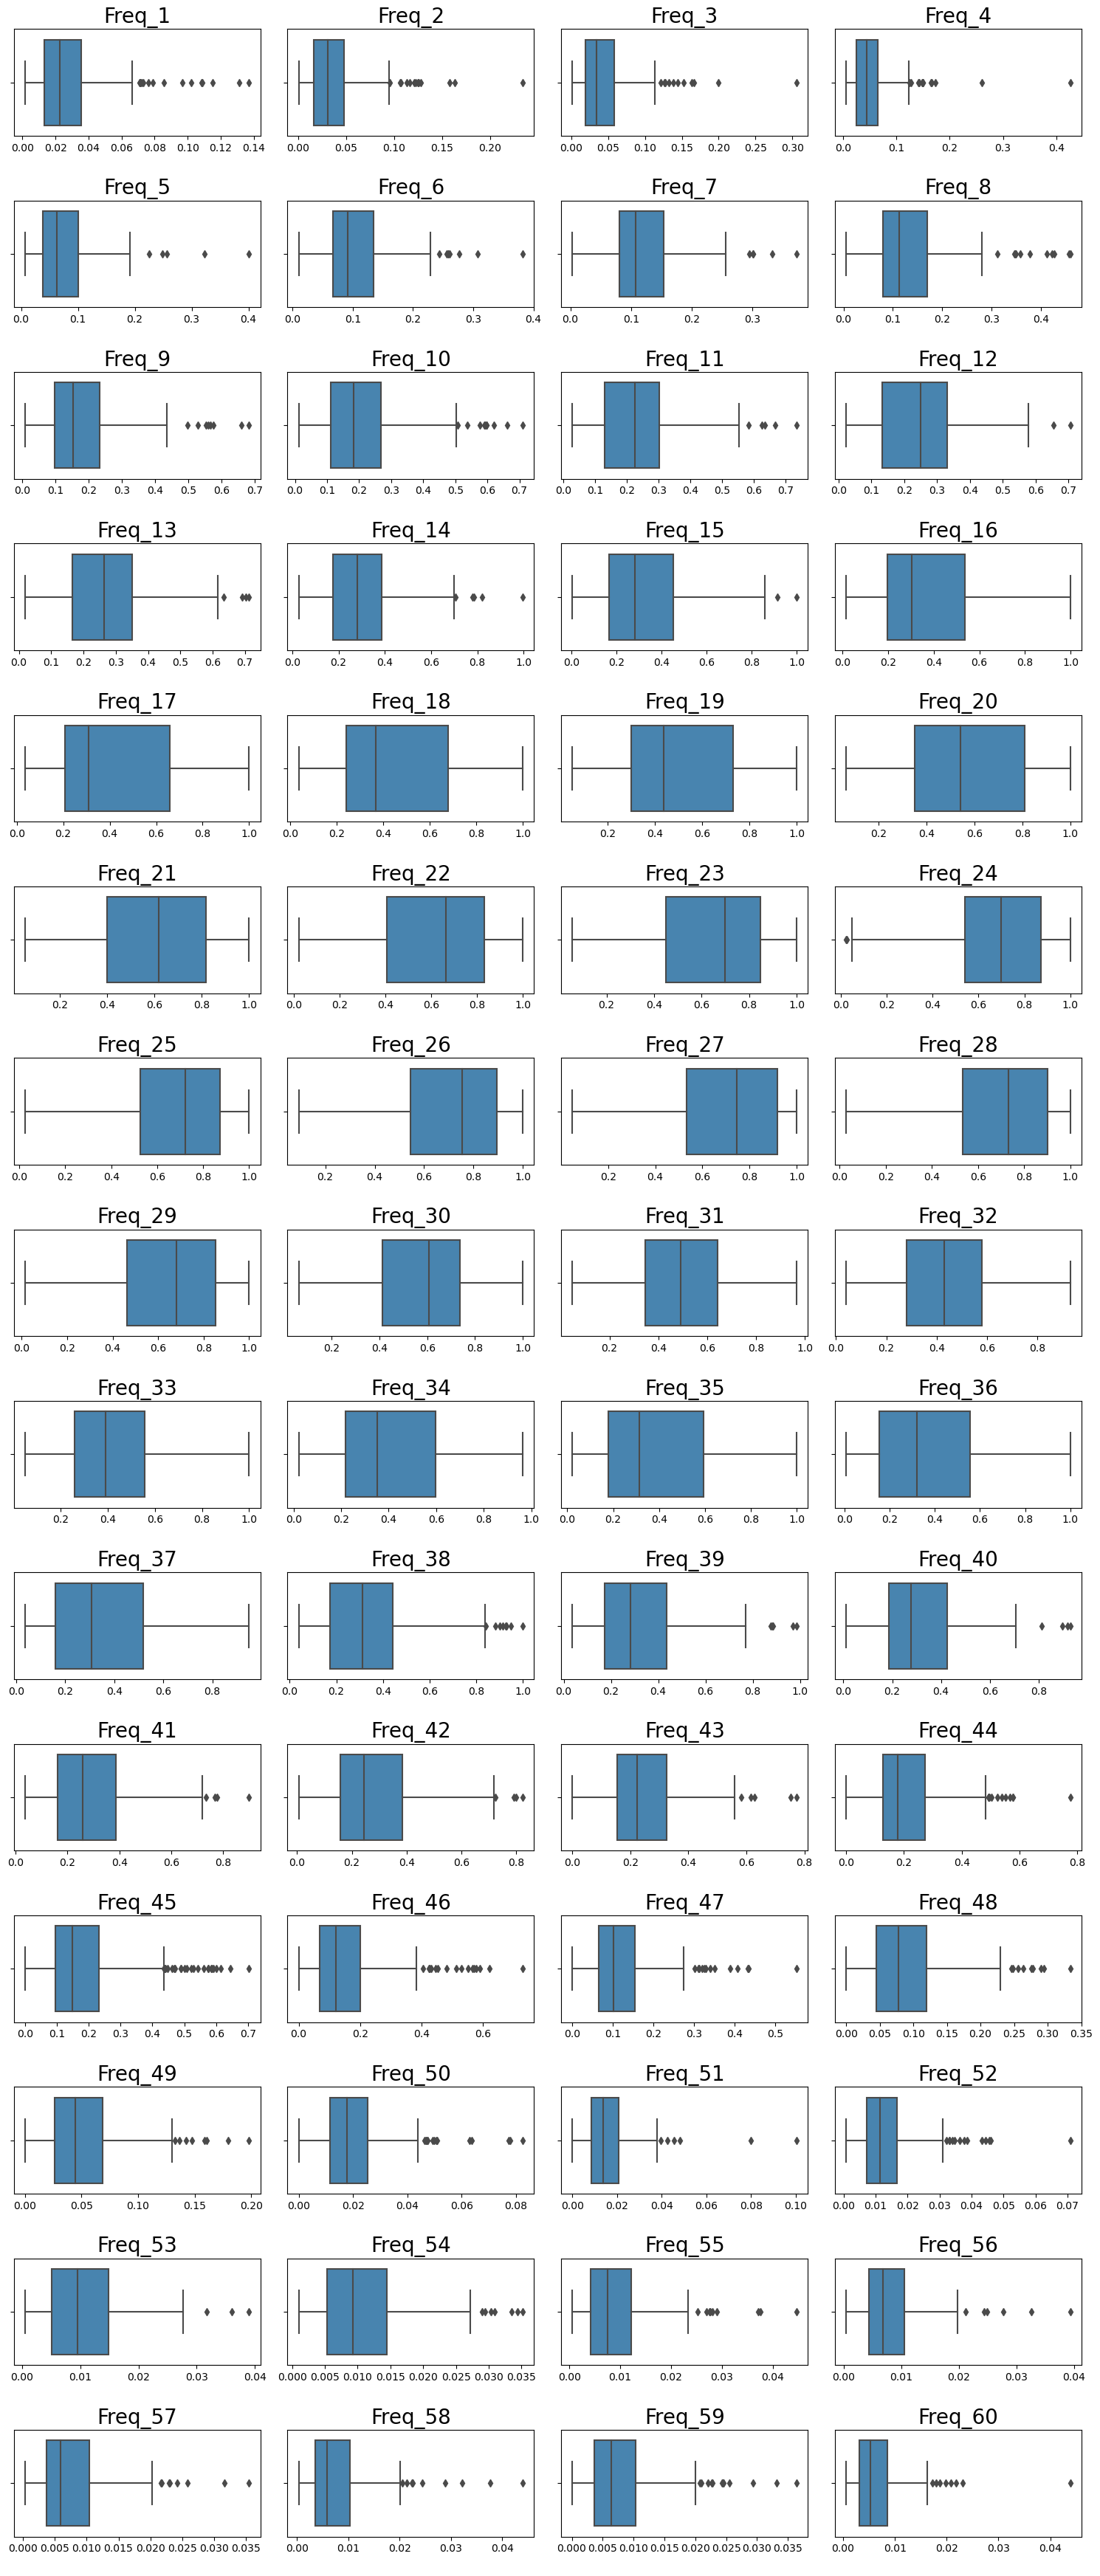

In [19]:
plt.figure(figsize=(15,35))
for i in range(0, len(num)):
    plt.subplot(15,4,i+1)
    sns.boxplot(x=eda[num[i]], palette='Blues_d')
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

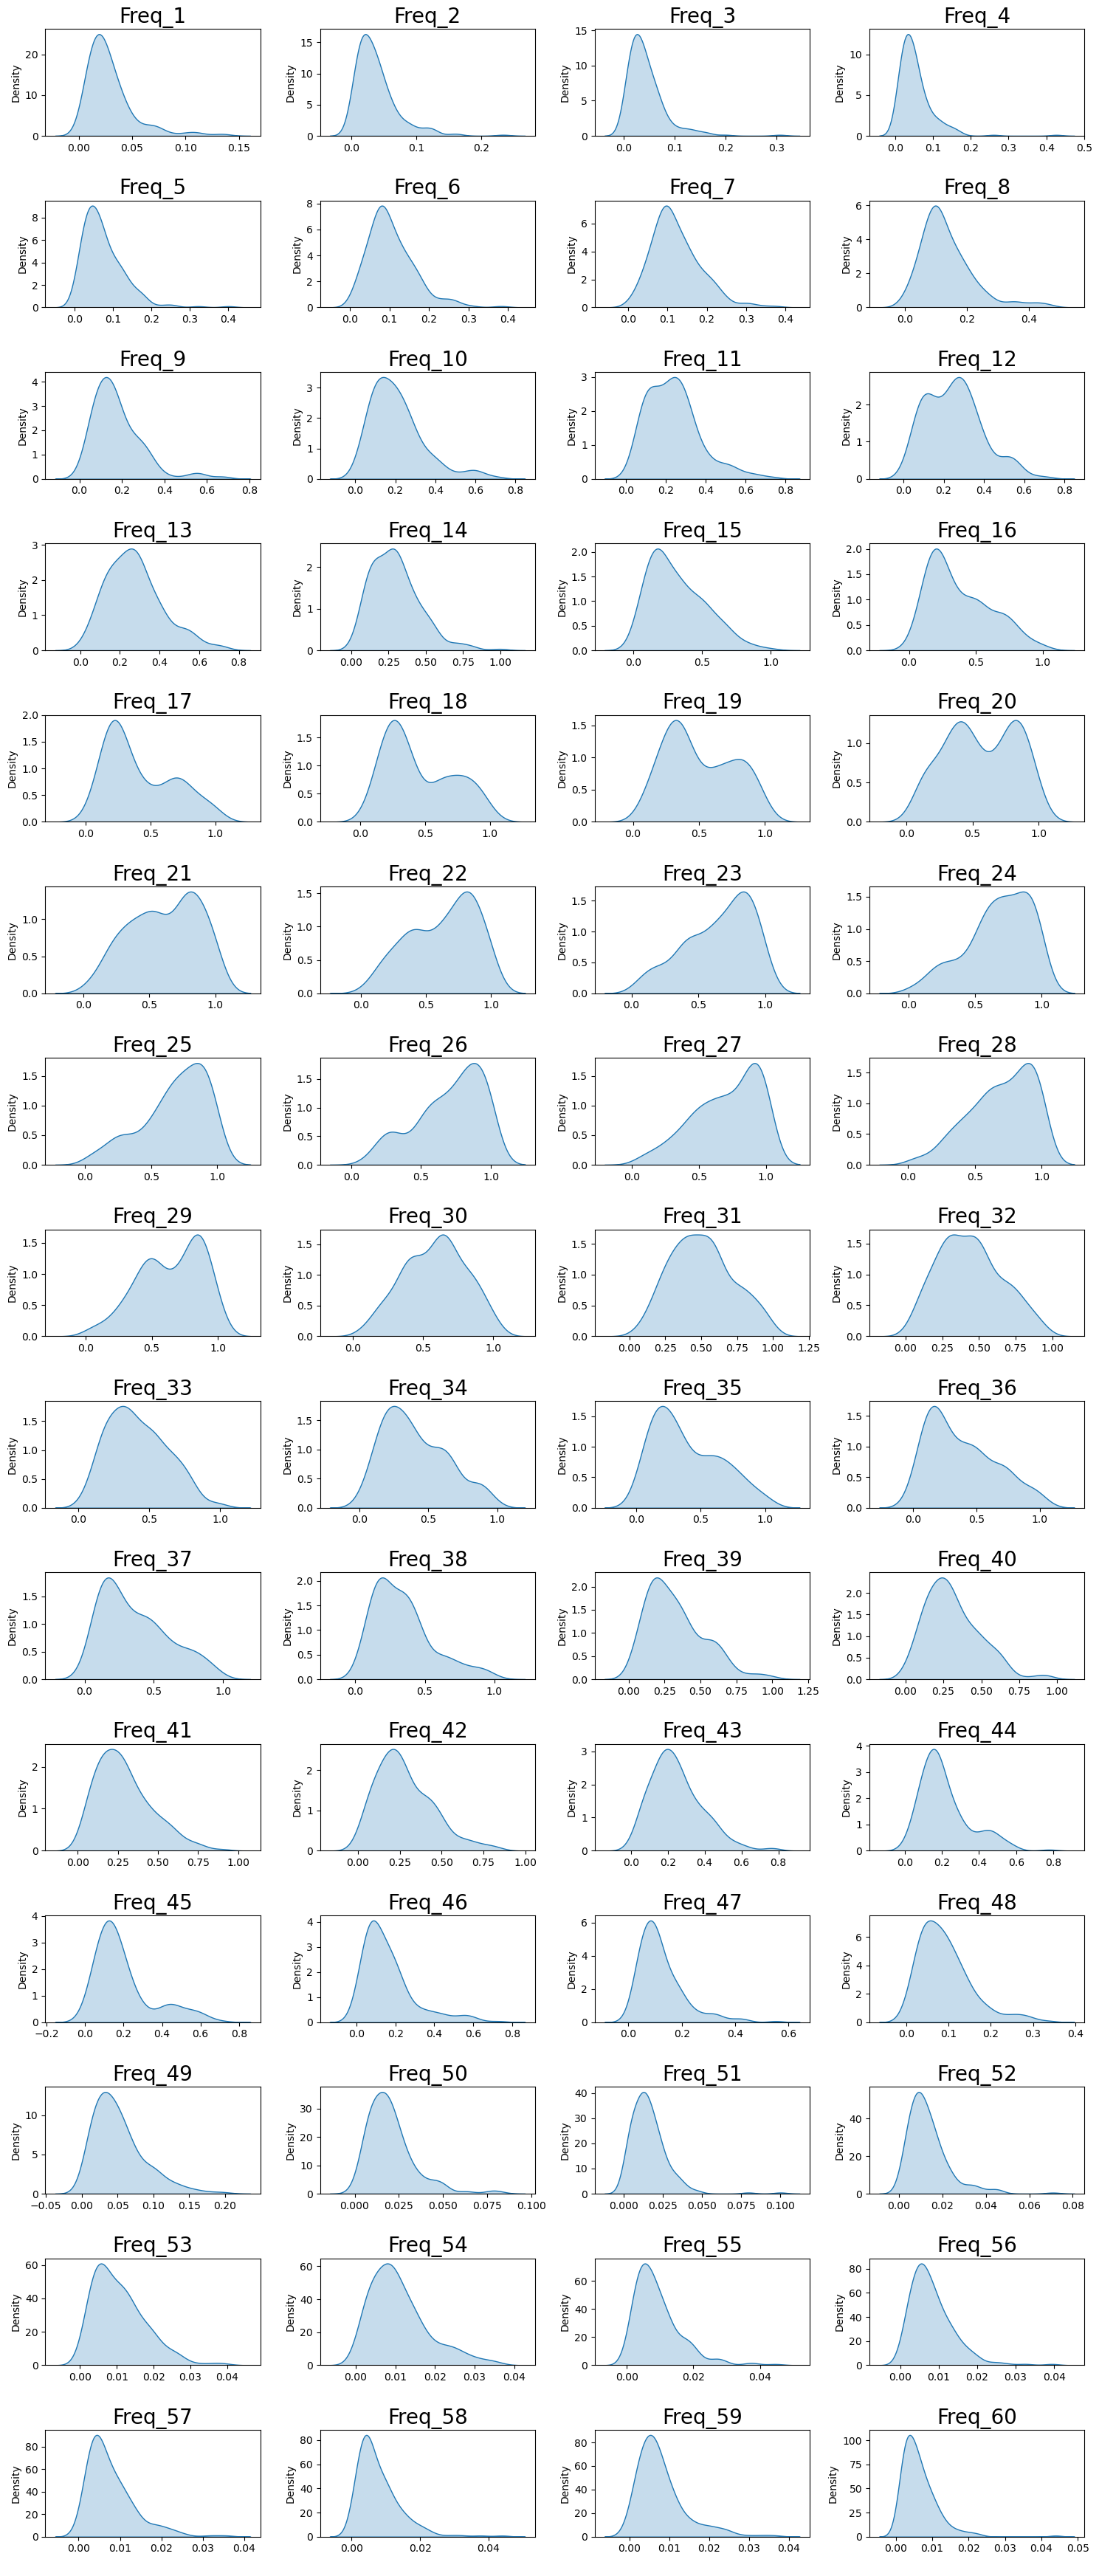

In [20]:
plt.figure(figsize=(15,35))
for i in range(0, len(num)):
    plt.subplot(15,4,i+1)
    sns.kdeplot(x=eda[num[i]], palette='viridis', shade=True)
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

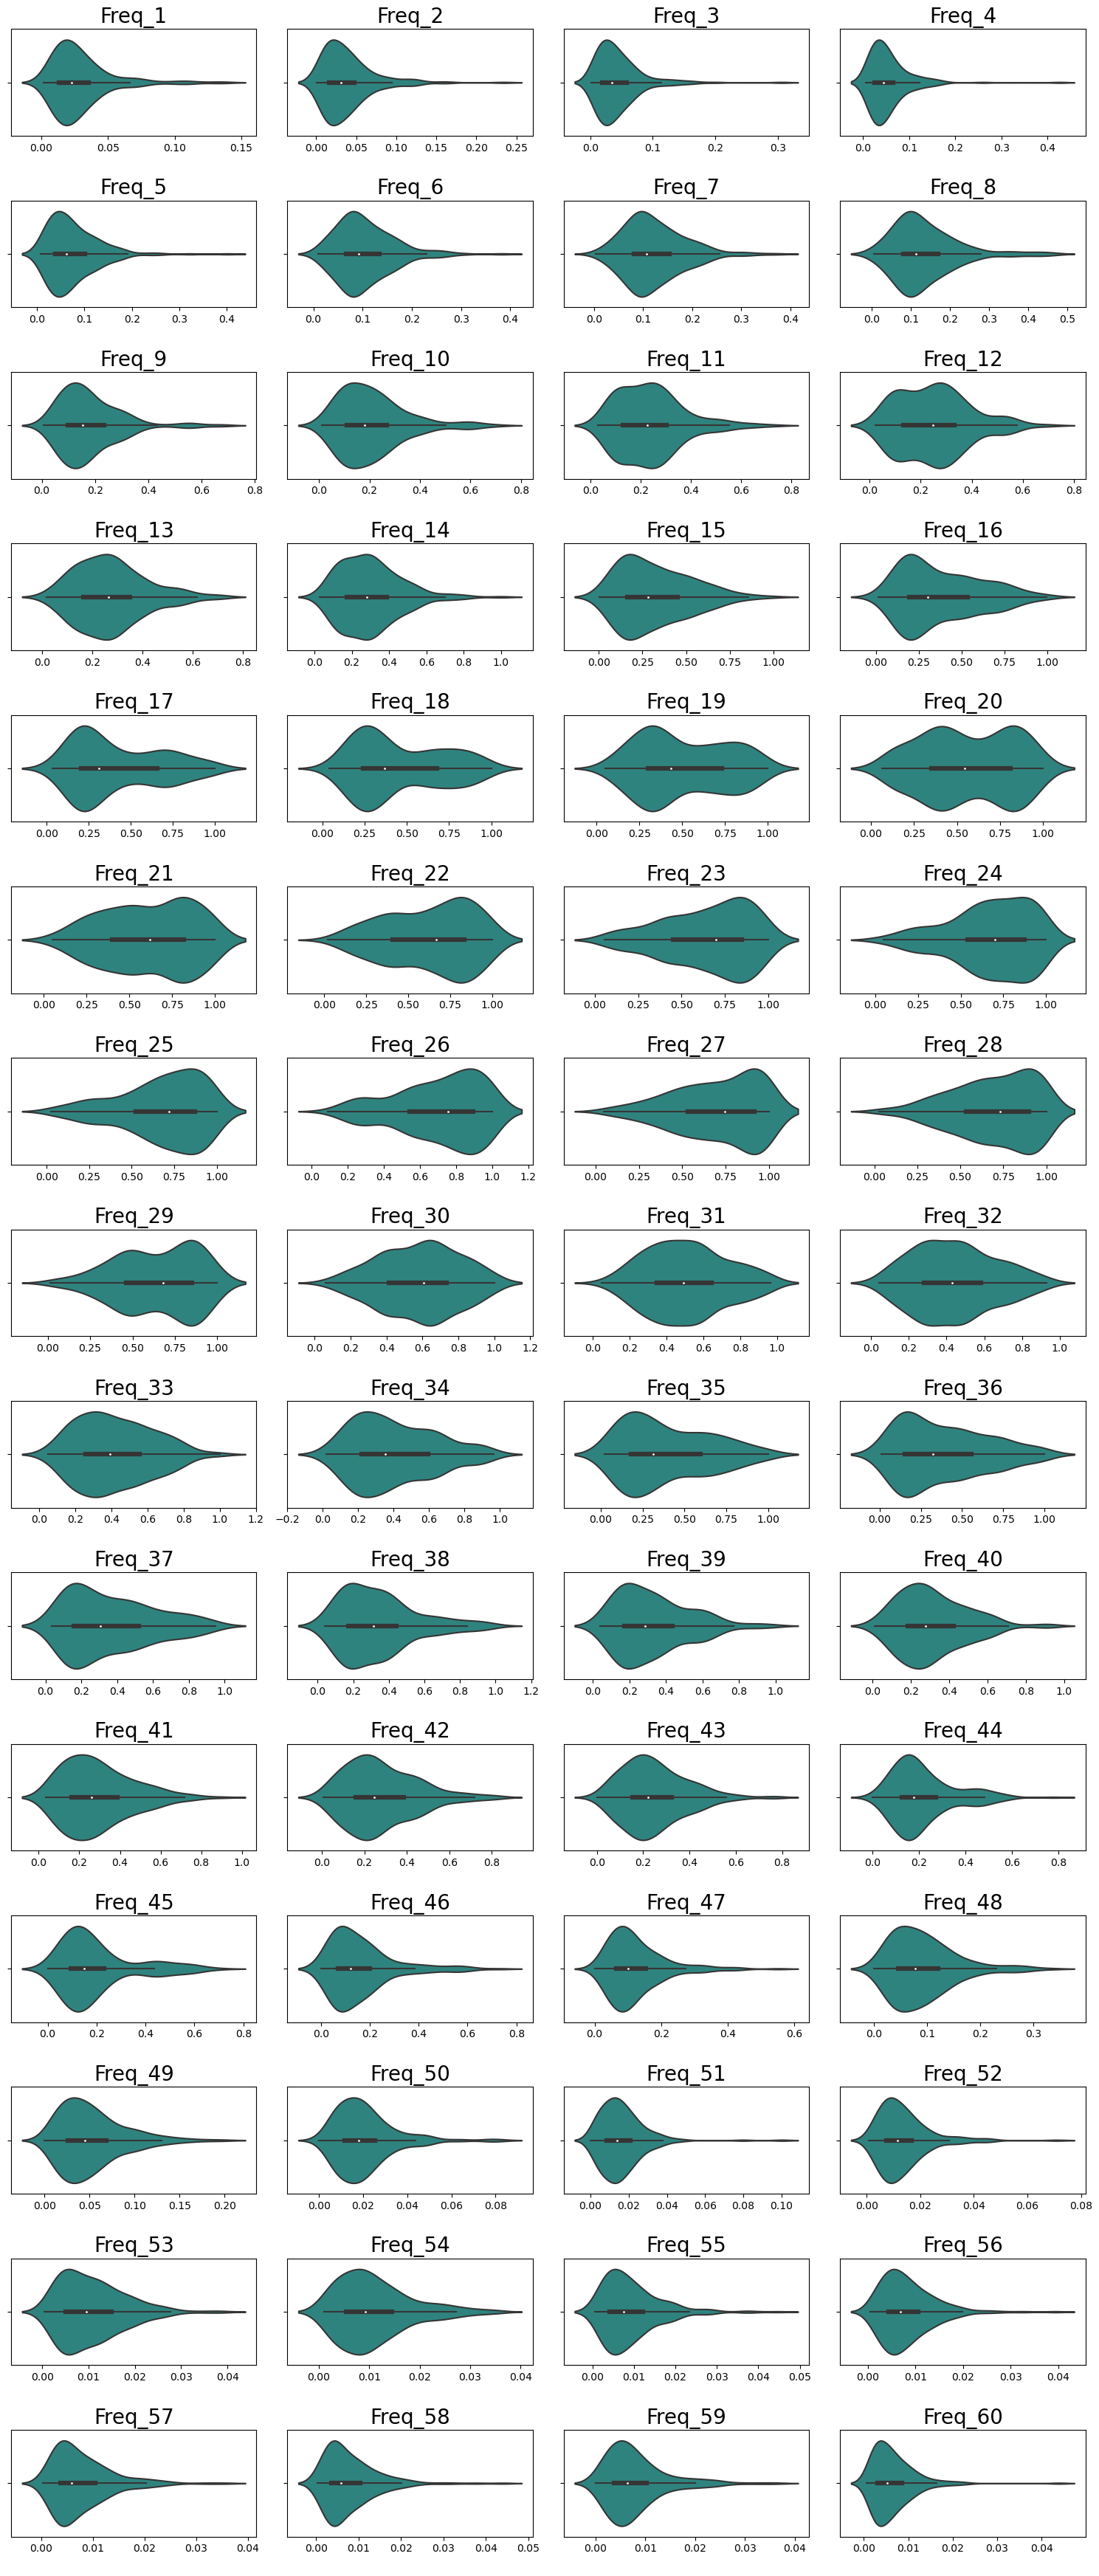

In [21]:
plt.figure(figsize=(15,35))
for i in range(0, len(num)):
    plt.subplot(15,4,i+1)
    sns.violinplot(x=eda[num[i]], palette='viridis')
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

Text(0.5, 1.0, 'Rock Vs Mine')

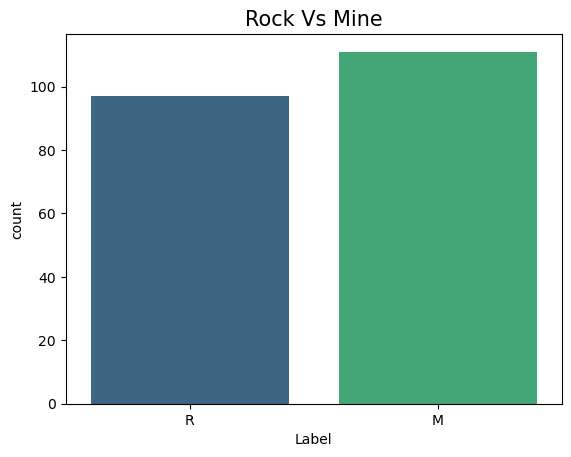

In [26]:
sns.countplot(eda['Label'], palette='viridis')
plt.title('Rock Vs Mine', fontsize=15)

## Bivariate Analysis

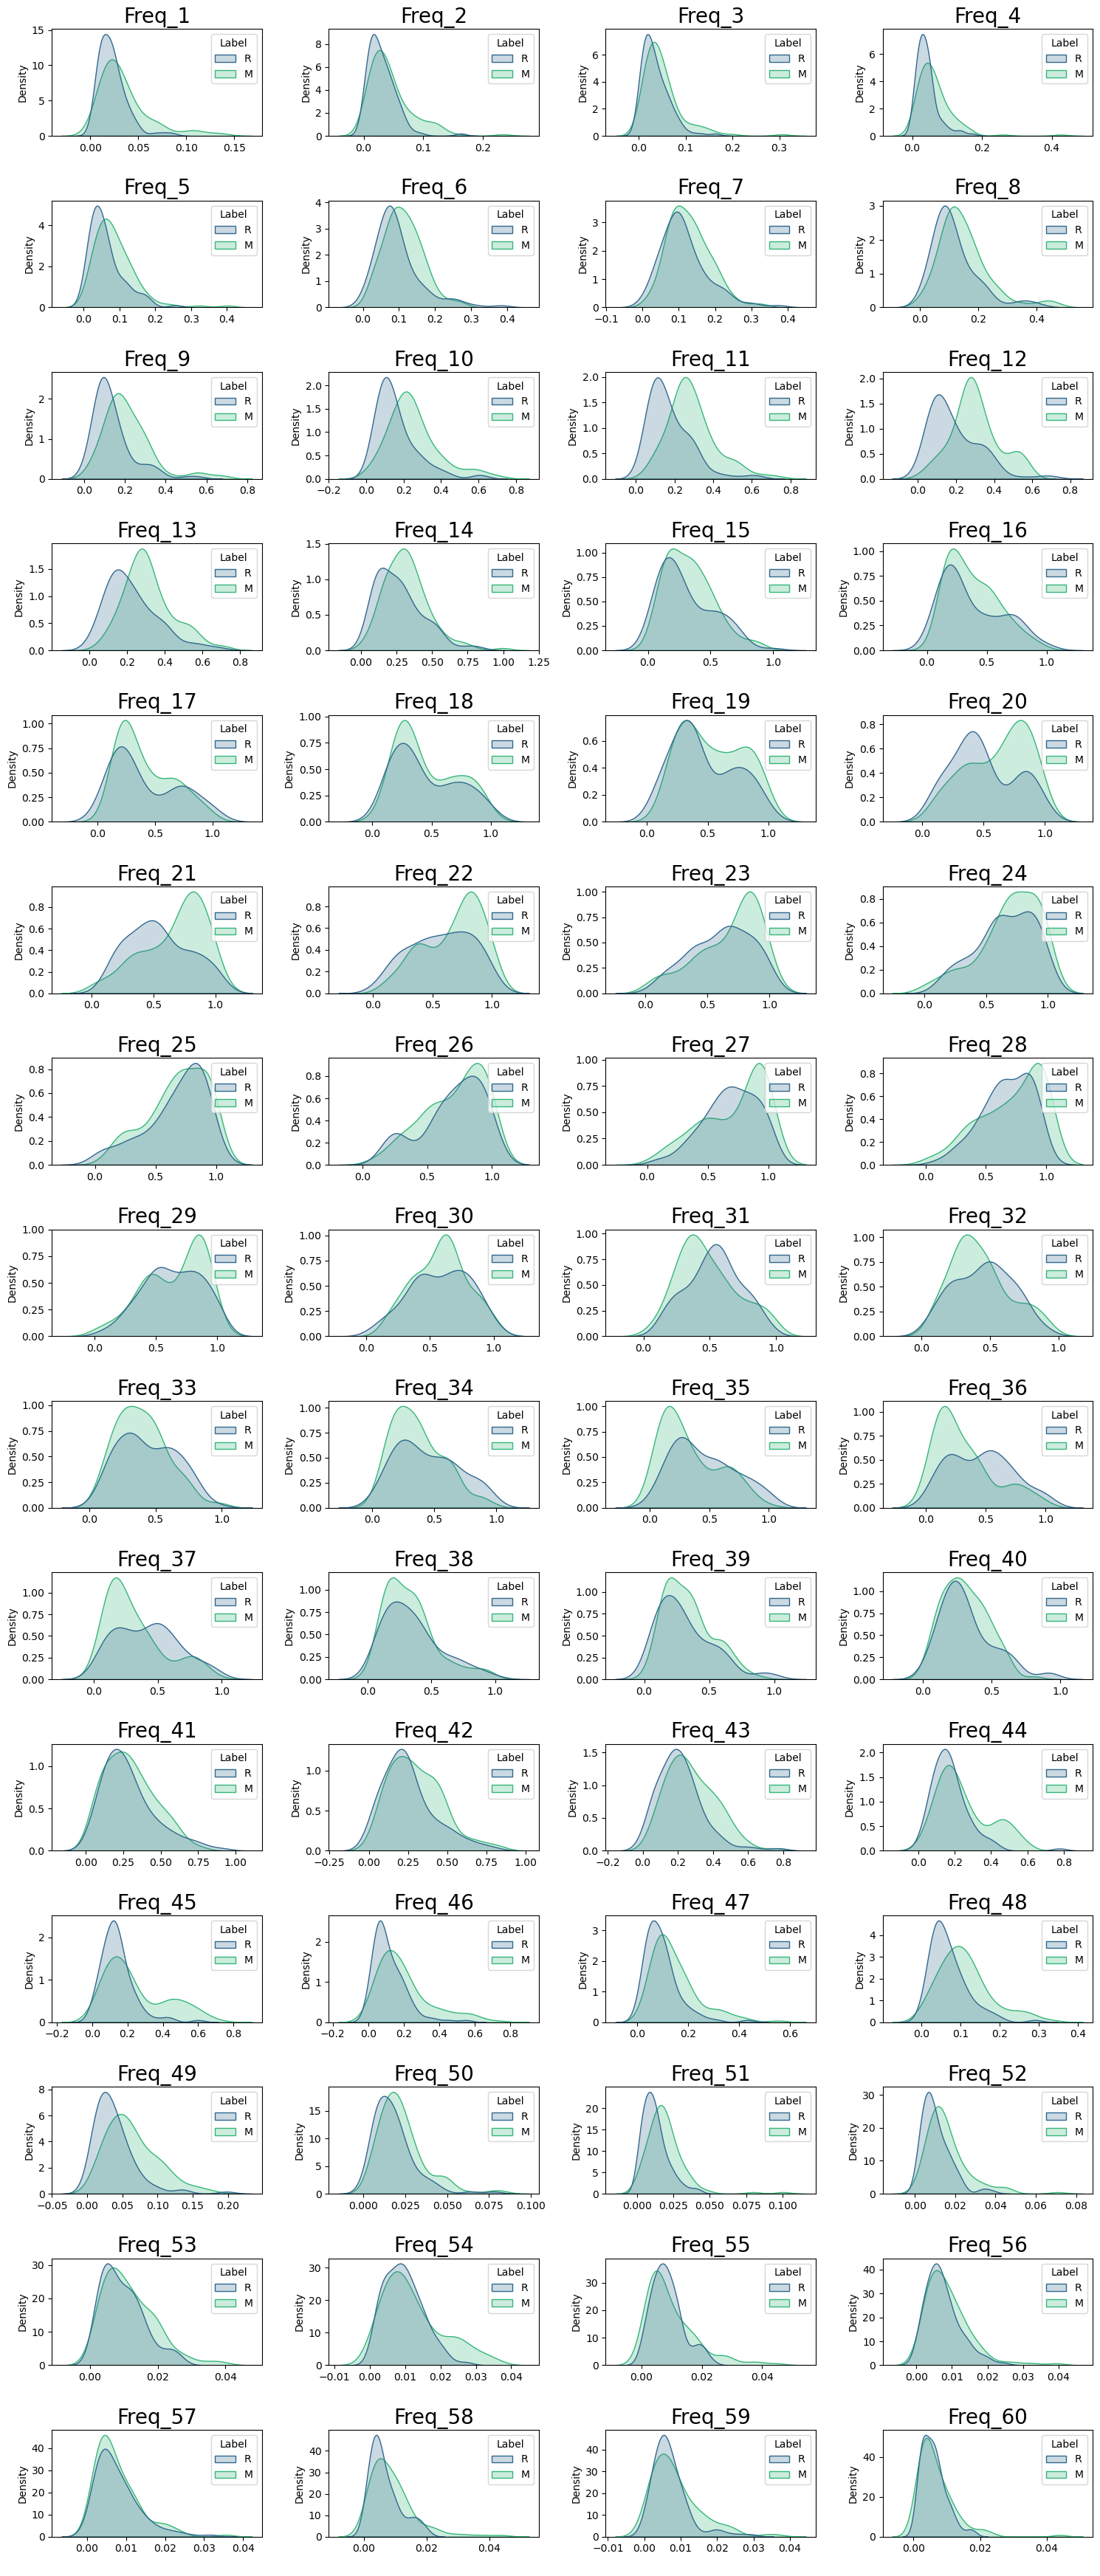

In [23]:
plt.figure(figsize=(15,35))
for i in range(0, len(num)):
    plt.subplot(15,4,i+1)
    sns.kdeplot(x=eda[num[i]], palette='viridis', shade=True, hue=eda['Label'])
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

## Correlation Heatmap Analysis

<AxesSubplot:>

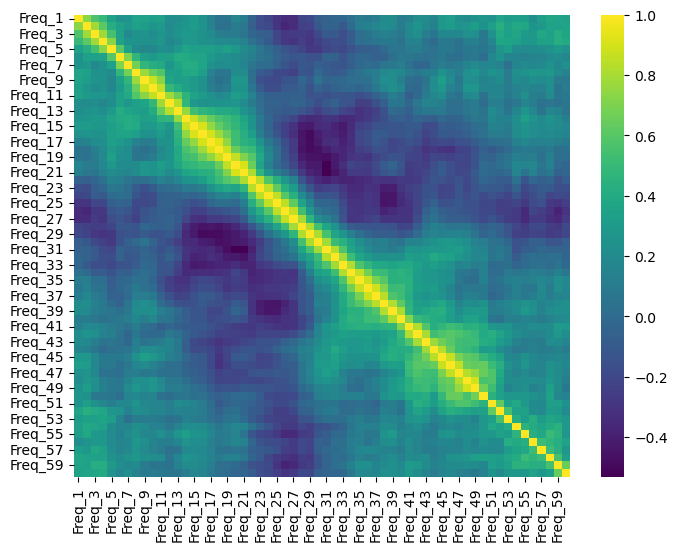

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(eda.corr(),cmap='viridis')

In [34]:
# change target label into numeric
eda['Target'] = eda['Label'].map({'R':0,'M':1})

# show top 5 highest correlation to target
np.abs(eda.corr()['Target']).sort_values().tail(6)

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Target     1.000000
Name: Target, dtype: float64

# Pre Processing

## Label Encoding

In [37]:
# change target label into numeric
df['Target'] = df['Label'].map({'R':0,'M':1})
df['Target'].value_counts()

1    111
0     97
Name: Target, dtype: int64

## Train Test Split

In [47]:
X = df.drop(['Target','Label'],axis=1)
y = df['Target']

In [48]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1, 
                                                    random_state=42)

## Create a PipeLine

In [49]:
# we create a PipeLine that contains both a StandardScaler and a KNN model
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
knn = KNeighborsClassifier()

# operation
operations = [('scaler',scaler),('knn',knn)]

# pipeline
pipe = Pipeline(operations)

# Modeling

## Model Training

In [50]:
from sklearn.model_selection import GridSearchCV

# set number of k
k_values = list(range(1,30))

# set parameter
param_grid = {'knn__n_neighbors': k_values}

# perform grid cv
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

# fit model
full_cv_classifier.fit(X_train,y_train)

# get parameter
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [51]:
# show mean test scores per K value

full_cv_classifier.cv_results_['mean_test_score']

array([0.84537696, 0.83485064, 0.77524893, 0.76486486, 0.75931721,
       0.75974395, 0.75945946, 0.74352774, 0.7113798 , 0.73812233,
       0.70042674, 0.72759602, 0.68449502, 0.70085349, 0.69530583,
       0.69544808, 0.7113798 , 0.71678521, 0.72204836, 0.71664296,
       0.70071124, 0.69544808, 0.69530583, 0.69004267, 0.68477952,
       0.6688478 , 0.67411095, 0.67411095, 0.6685633 ])

Text(0, 0.5, 'Accuracy')

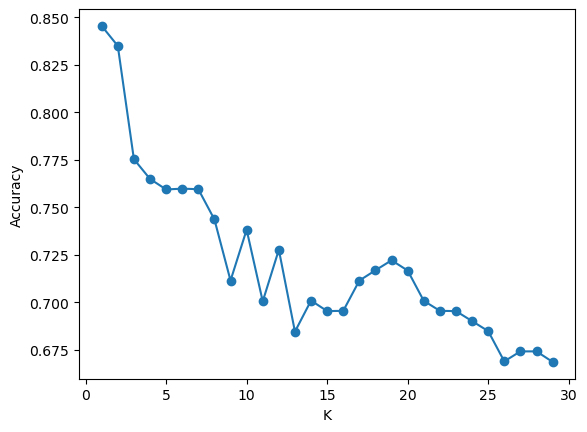

In [52]:
scores = full_cv_classifier.cv_results_['mean_test_score']
plt.plot(k_values,scores,'o-')
plt.xlabel("K")
plt.ylabel("Accuracy")

## Testing

In [54]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# predict
pred = full_cv_classifier.predict(X_test)

In [55]:
confusion_matrix(y_test,pred)

array([[ 7,  1],
       [ 1, 12]])

In [56]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.92      0.92      0.92        13

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21

